<a href="https://www.kaggle.com/code/mohamedmustafashaban/fetal-health-classification?scriptVersionId=212367635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1- Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings('ignore')
sns.set()
%matplotlib inline


## **2- read dataset**

In [2]:
df = pd.read_csv("/kaggle/input/fetal-health-classification/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## **3- information of The dataset**

In [3]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
df.duplicated().sum()

13

In [7]:
df.shape

(2126, 22)

## **4- preprocessing of the data**

In [8]:
duplicateds = df.copy()
duplicateds.drop_duplicates(inplace= True)
print("sum of duplicated = ", df.duplicated().sum())
print("is the data not duplicated")
df = duplicateds.copy()
print("sum of duplicated = " , df.duplicated().sum())
df.duplicated().sum()

sum of duplicated =  13
is the data not duplicated
sum of duplicated =  0


0

In [9]:
X = df.drop(["fetal_health"], axis=1)
y = df["fetal_health"]

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

## **5- Visualizing data**

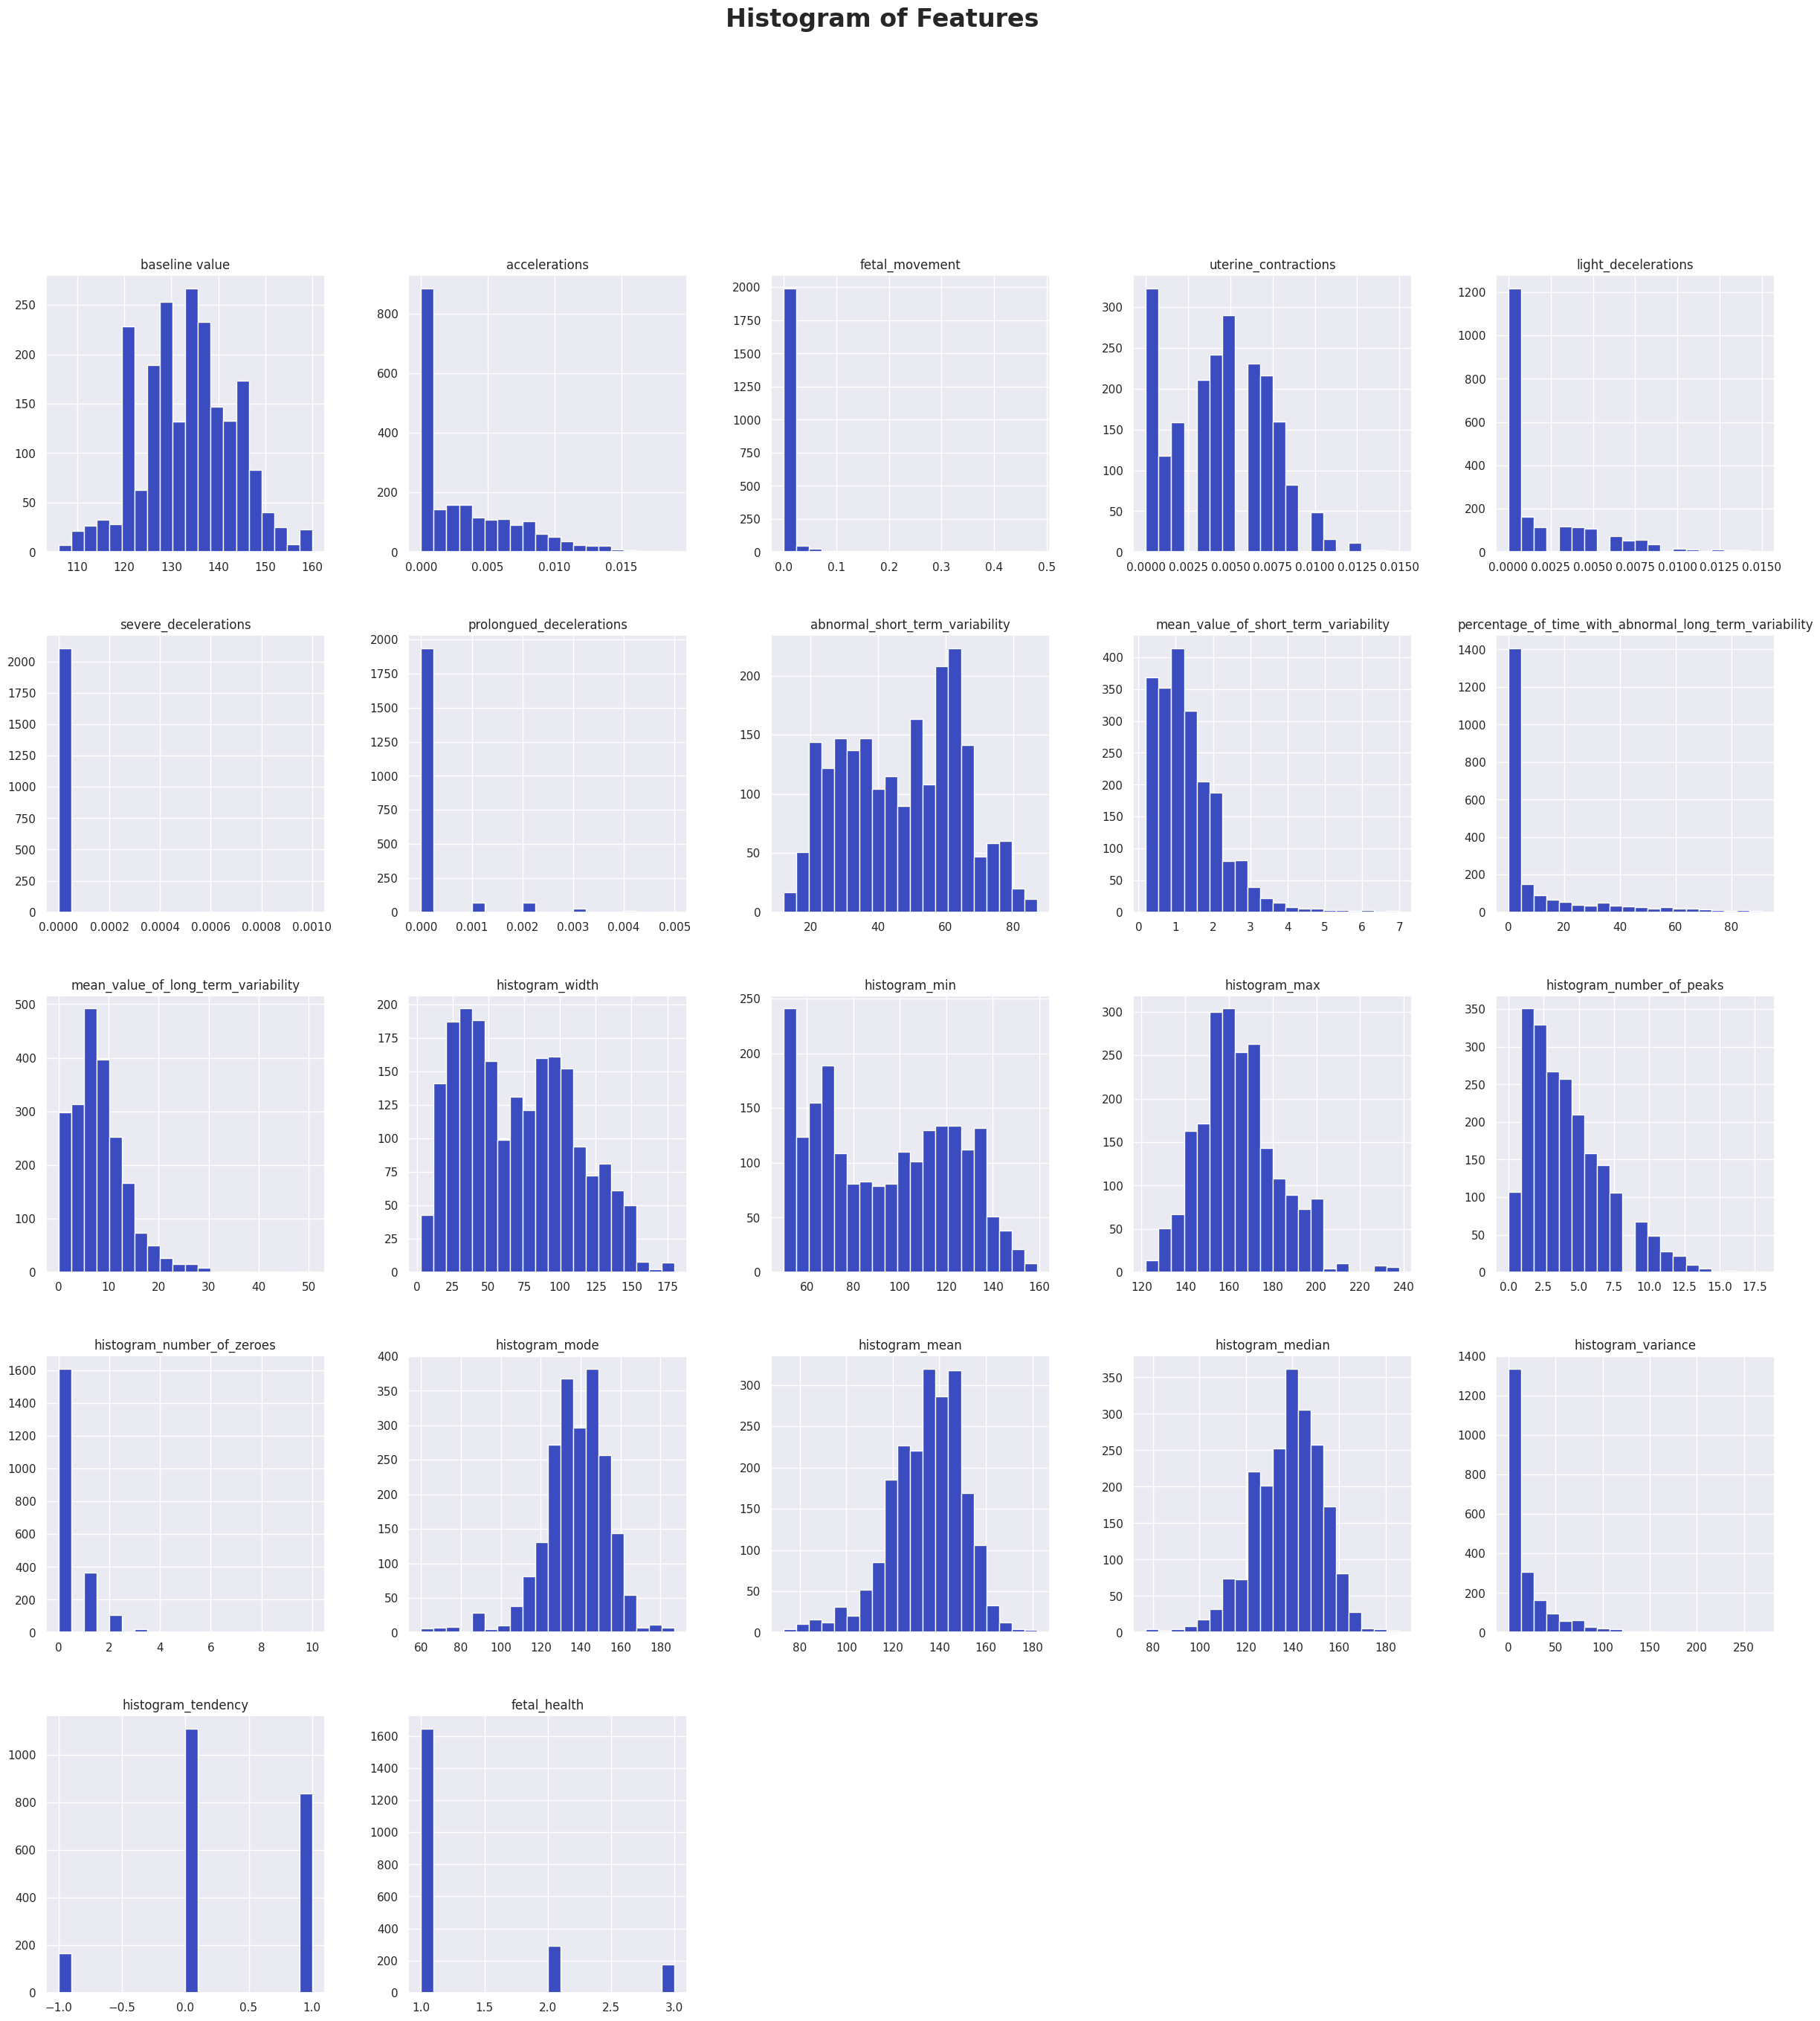

In [11]:
df.hist(bins=20, figsize=(30, 30), color=plt.get_cmap('coolwarm')(np.linspace(0, 1, 1)), grid=True)
hist_features = plt.suptitle('Histogram of Features',
                             y=1,
                             fontsize=24,
                             fontweight='bold')

Text(0.5, 1.0, 'Pie chart by fetal health')

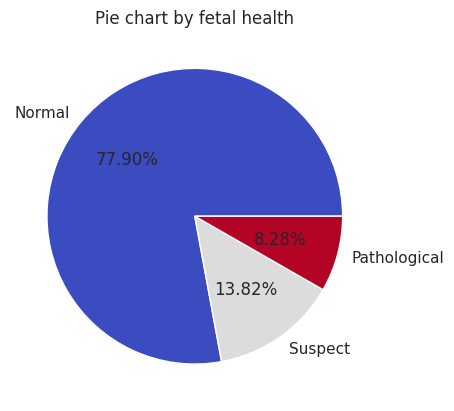

In [12]:
normal = (df['fetal_health'] == 1.0).sum()
suspect = (df['fetal_health'] == 2.0).sum()
pathological = (df['fetal_health'] == 3.0).sum()

pie_fetal_health = plt.pie([normal, suspect, pathological], labels=['Normal', 'Suspect', 'Pathological'],
                           colors=plt.get_cmap('coolwarm')(np.linspace(0, 1, 3)),
                           autopct="%1.2f%%")

plt.title('Pie chart by fetal health' )



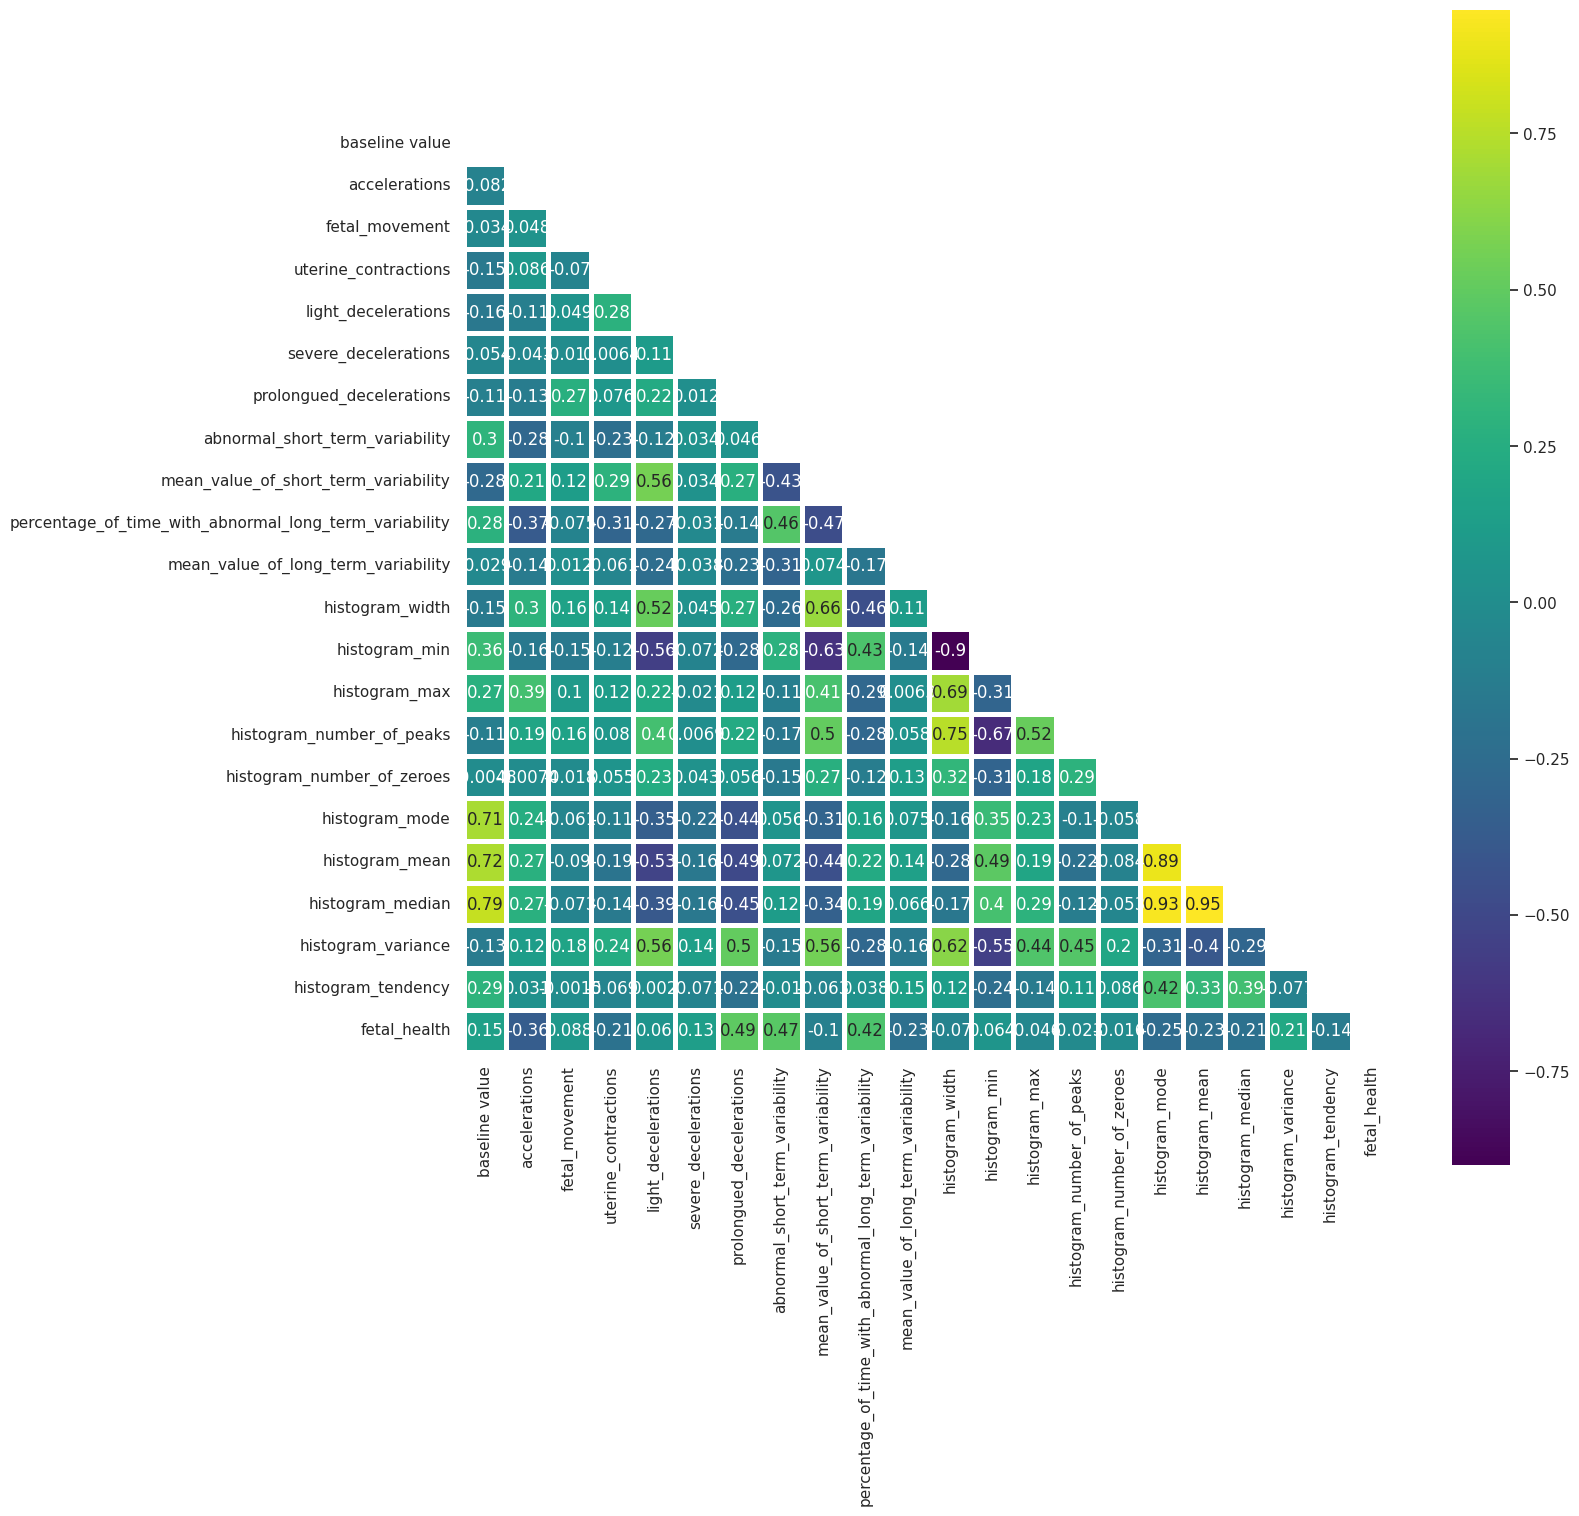

In [13]:

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)



Text(0.5, 1.0, 'Correlation Matrix')

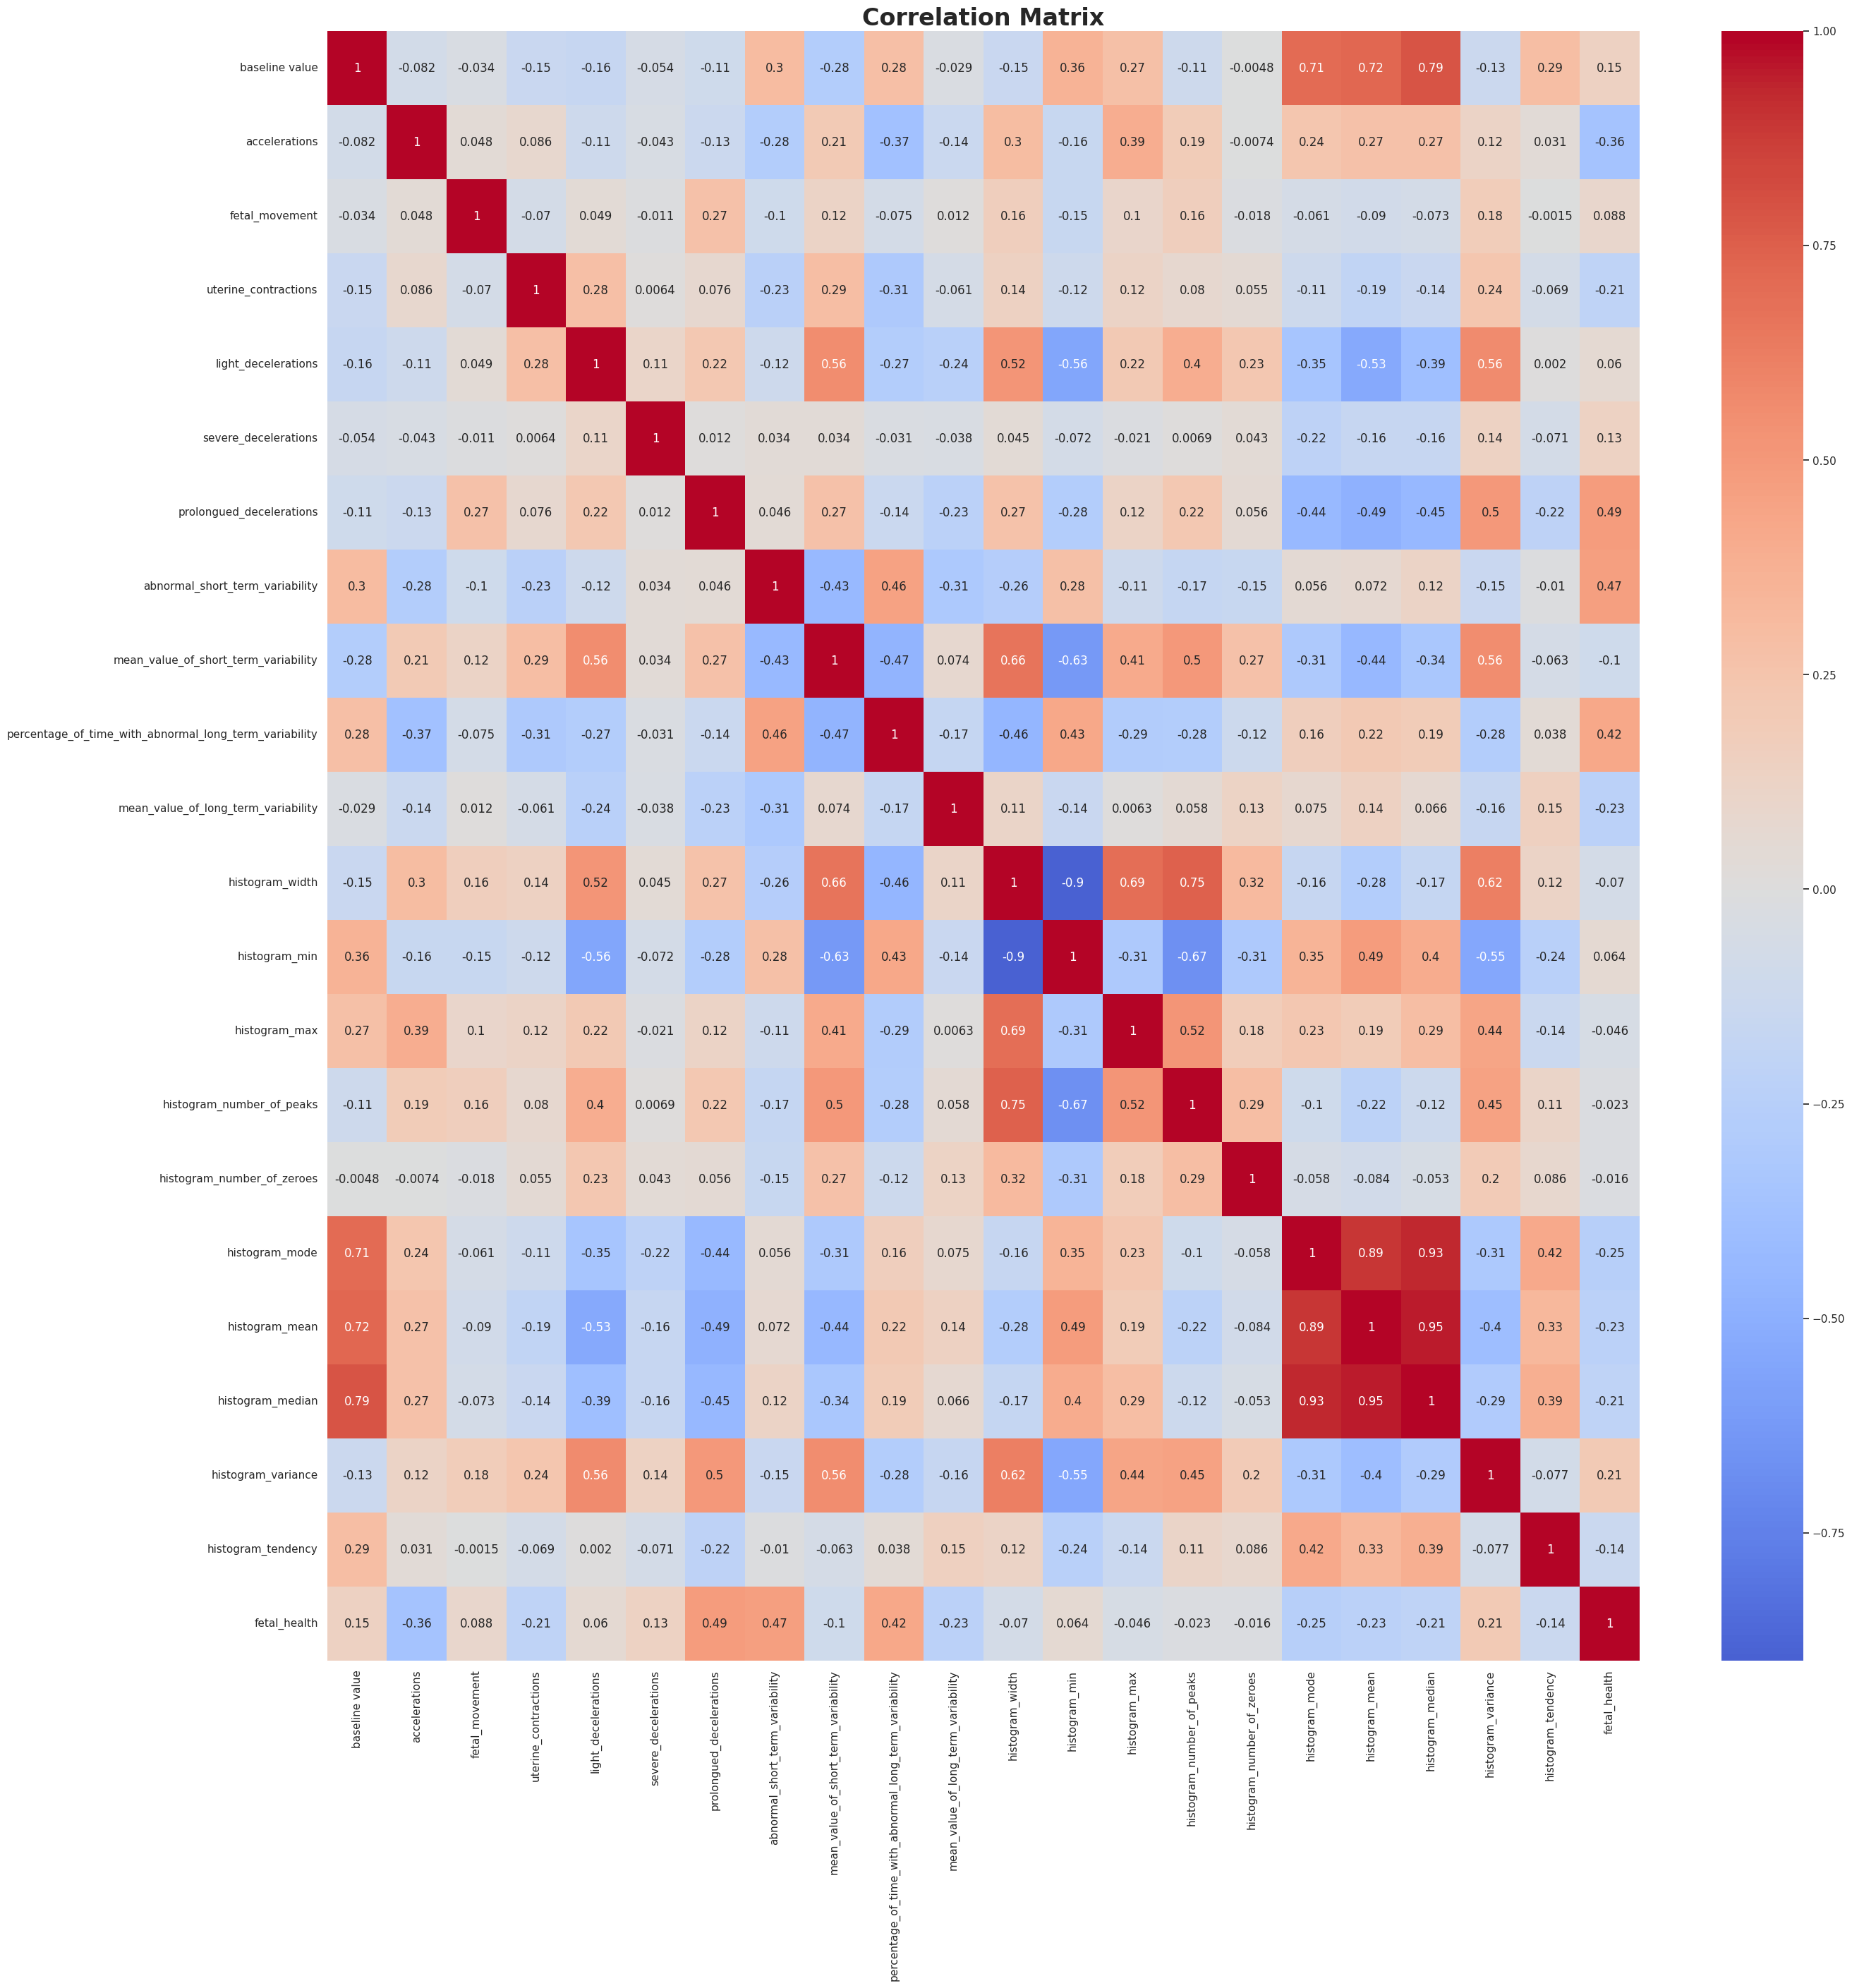

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix',
          fontsize=24,
          fontweight='bold')

Text(0.5, 1.0, 'Feature Importance')

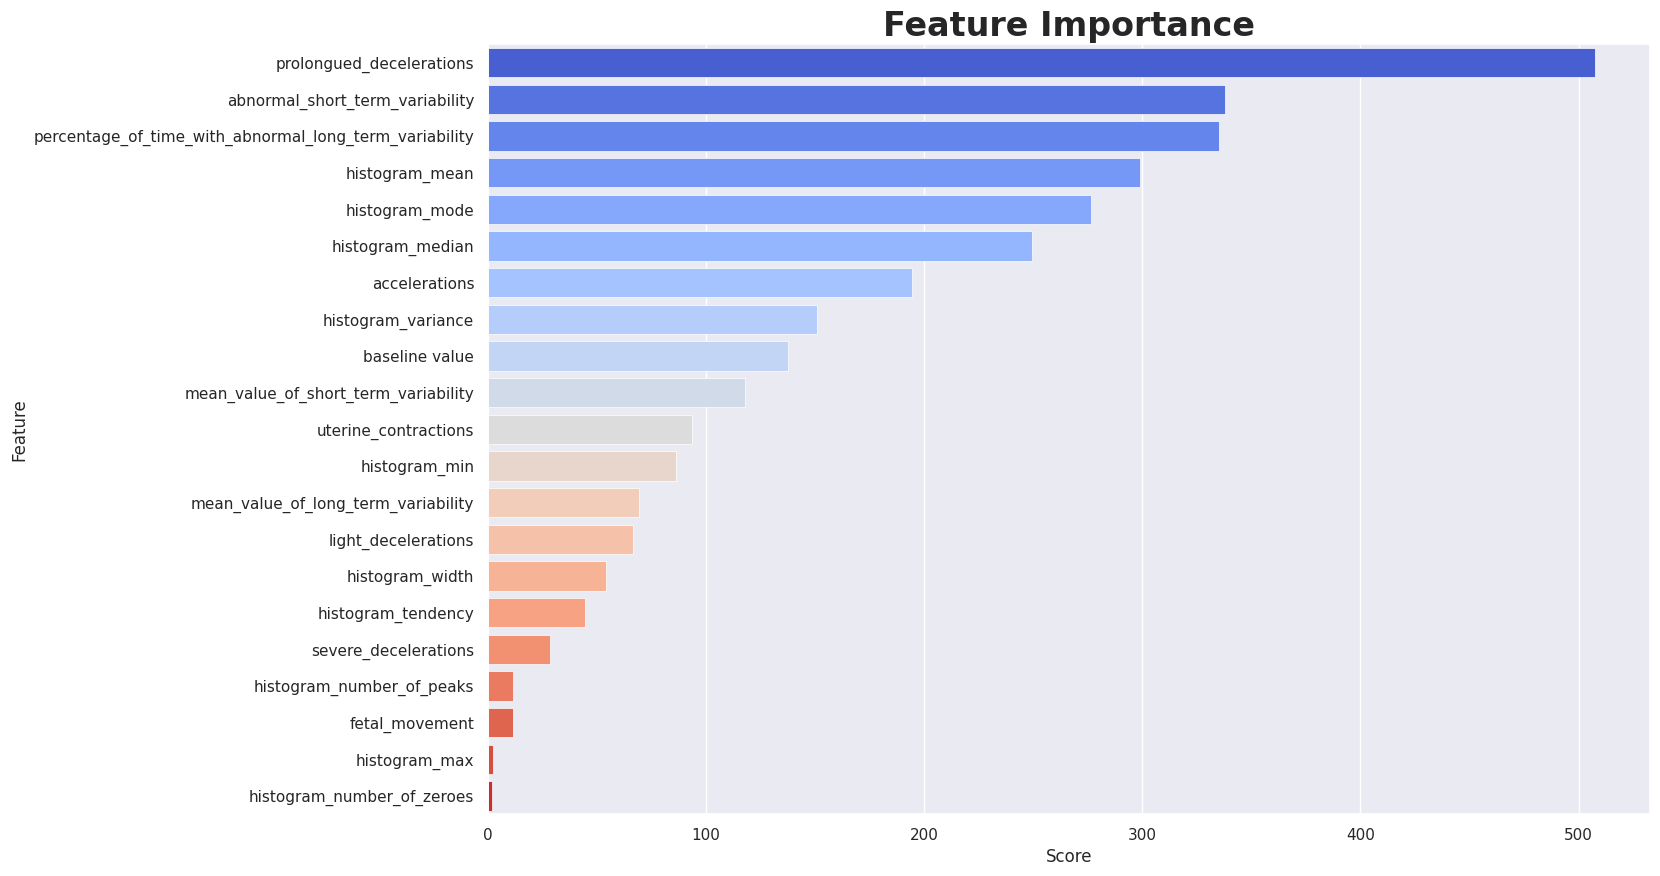

In [15]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', 
                   linewidth=0.5, saturation=2,orient='h')

plt.title('Feature Importance', fontsize=24, fontweight='bold')

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.title(title,
              fontsize=24,
              fontweight='bold')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=10, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy', shuffle=True, random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    return plt

## **6-spliting data**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1584, 21), (529, 21), (1584,), (529,))

## **7- KNN_model_with a best pramter from gridsearch**

In [18]:
knn =KNeighborsClassifier()

In [19]:
param = {'n_neighbors': list(range(1, 30)), 'p':(1,2),
              'weights': ('uniform', 'distance'),
                   'metric': ('minkowski', 'chebyshev')}


In [20]:
Grid_model = GridSearchCV(knn, param , cv= 5)

In [21]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': (1, 2), 'weights': ('uniform', 'distance')})

In [22]:
print (Grid_model.best_params_)
print(Grid_model.best_score_)

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.9103621770554646


In [23]:
knn = KNeighborsClassifier (n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [24]:
y_pred_knn = knn.predict(X_test)
print("classification_report")
print(classification_report(y_test,y_pred_knn))
print("accuracy ==" ,accuracy_score(y_test,y_pred_knn) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       420
         2.0       0.78      0.67      0.72        73
         3.0       0.86      0.86      0.86        36

    accuracy                           0.92       529
   macro avg       0.86      0.83      0.85       529
weighted avg       0.92      0.92      0.92       529

accuracy == 92.06049149338375


<Axes: >

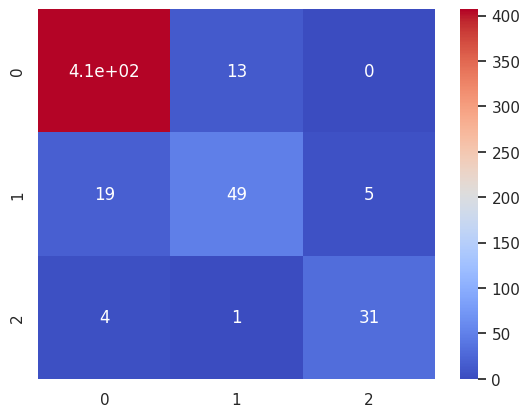

In [25]:
cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm , annot= True, cmap='coolwarm' )

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

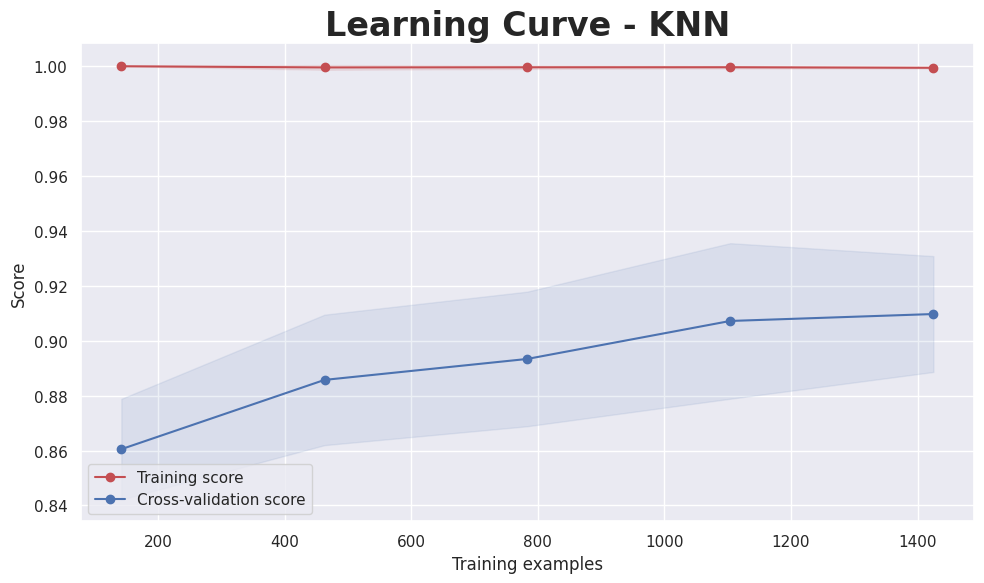

In [26]:
plot_learning_curve(Grid_model.best_estimator_, "Learning Curve - KNN", X_train, y_train, n_jobs=-1)

## **8- LogisticRegression_with a best pramter from gridsearch**

In [27]:
log_model = LogisticRegression()

In [28]:
param_log ={"penalty":['l1','l2','elasticnet',None], 'C': [1.0, 2.0, 3.0, 4.0],
         "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag','saga']}



In [29]:
Grid_model = GridSearchCV(log_model, param_log , cv= 5)

In [30]:
Grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [31]:
print (Grid_model.best_params_)
print(Grid_model.best_score_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.8857545022561195


In [32]:
log_model = LogisticRegression(penalty= 'l1', solver= 'liblinear', C= 1.0)

In [33]:
log_model.fit(X_train,y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [34]:
y_pred_log = log_model.predict(X_test)
print("classification_report")
print(classification_report(y_test,y_pred_log))
print("accuracy ==" ,accuracy_score(y_test,y_pred_log) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       420
         2.0       0.79      0.60      0.68        73
         3.0       0.90      0.78      0.84        36

    accuracy                           0.91       529
   macro avg       0.87      0.79      0.82       529
weighted avg       0.91      0.91      0.91       529

accuracy == 91.30434782608695


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

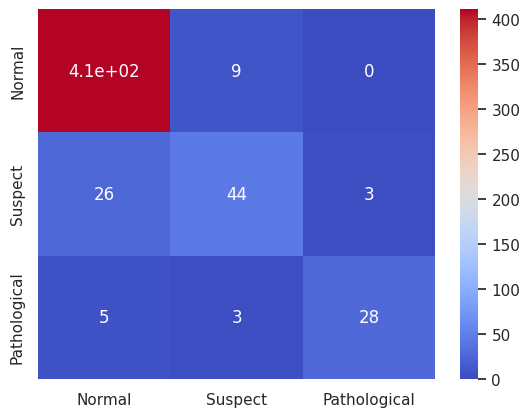

In [35]:
cm = confusion_matrix(y_test,y_pred_log)
ax = plt.subplot()
sns.heatmap(cm , annot= True ,cmap='coolwarm')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

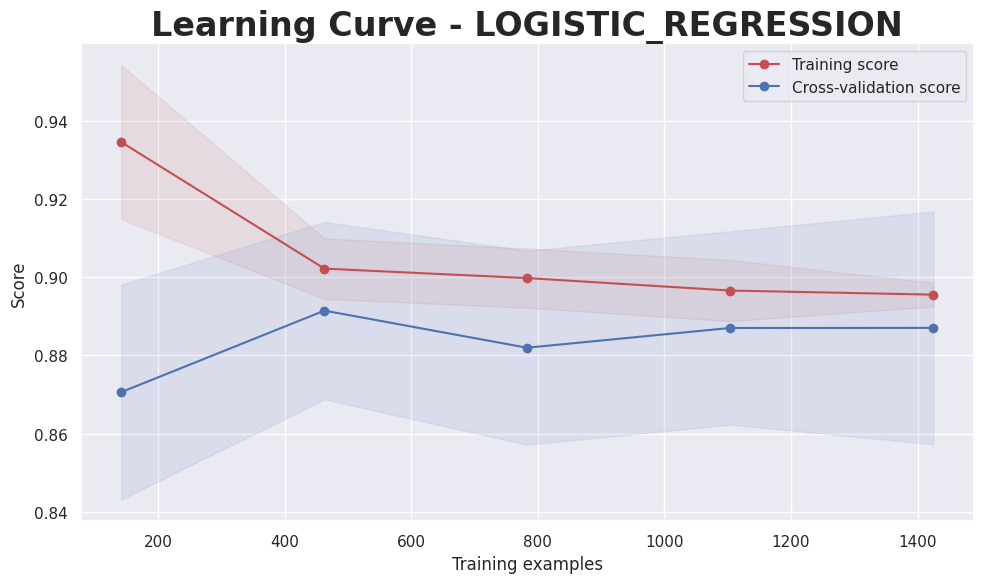

In [36]:
plot_learning_curve(Grid_model.best_estimator_, "Learning Curve - LOGISTIC_REGRESSION", X_train, y_train, n_jobs=-1)

## **9-supper vector machine-classifier algorithm_with a best pramter from gridsearch**

In [37]:
svc = SVC()

In [38]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=10)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [39]:
best_params_for_svc = grid_search_svc.best_params_
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [40]:
svc_classifier =SVC(**best_params_for_svc, random_state=42)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_svc))
print("accuracy ==" ,accuracy_score(y_test,y_pred_svc) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       420
         2.0       0.92      0.75      0.83        73
         3.0       0.92      0.97      0.95        36

    accuracy                           0.95       529
   macro avg       0.93      0.90      0.92       529
weighted avg       0.95      0.95      0.95       529

accuracy == 95.46313799621929


In [41]:
y_pred_svc = svc_classifier.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_svc))
print("accuracy ==" ,accuracy_score(y_test,y_pred_svc) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       420
         2.0       0.92      0.75      0.83        73
         3.0       0.92      0.97      0.95        36

    accuracy                           0.95       529
   macro avg       0.93      0.90      0.92       529
weighted avg       0.95      0.95      0.95       529

accuracy == 95.46313799621929


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

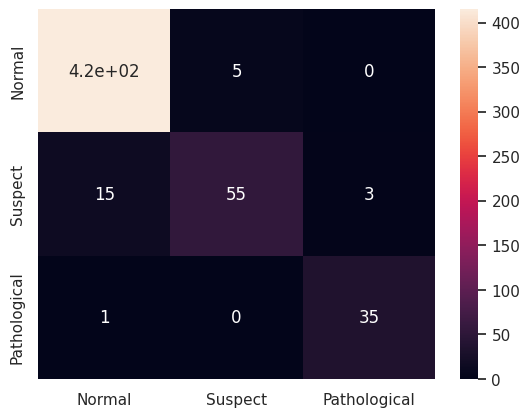

In [42]:
cm = confusion_matrix(y_test,y_pred_svc)
ax = plt.subplot()
sns.heatmap(cm , annot= True)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

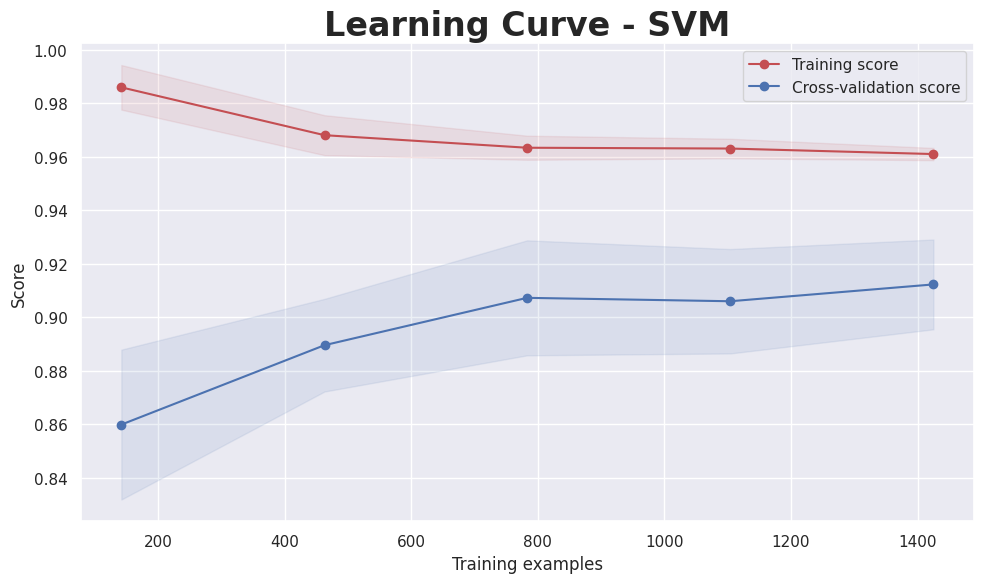

In [43]:
plot_learning_curve(grid_search_svc.best_estimator_, "Learning Curve - SVM", X_train, y_train, n_jobs=-1)

## **9-Randomforest-classifier algorithm_with a best pramter from gridsearch**

In [44]:
rf = RandomForestClassifier()

In [45]:
paramr = {
           'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), paramr, cv=10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [46]:
best_params_for_rf = grid_search_rf.best_params_
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [47]:
rf_classifier =RandomForestClassifier(**best_params_for_rf, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [48]:
y_pred_rf = rf_classifier.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_rf ))
print("accuracy == " ,accuracy_score(y_test,y_pred_rf) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       420
         2.0       0.92      0.81      0.86        73
         3.0       0.90      1.00      0.95        36

    accuracy                           0.96       529
   macro avg       0.93      0.93      0.93       529
weighted avg       0.96      0.96      0.96       529

accuracy ==  96.21928166351607


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

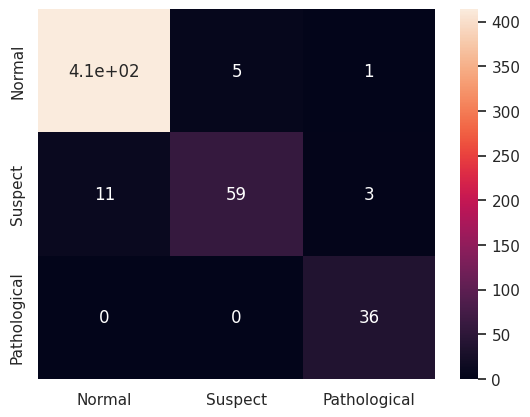

In [49]:
cm = confusion_matrix(y_test,y_pred_rf )
ax = plt.subplot()
sns.heatmap(cm , annot= True)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

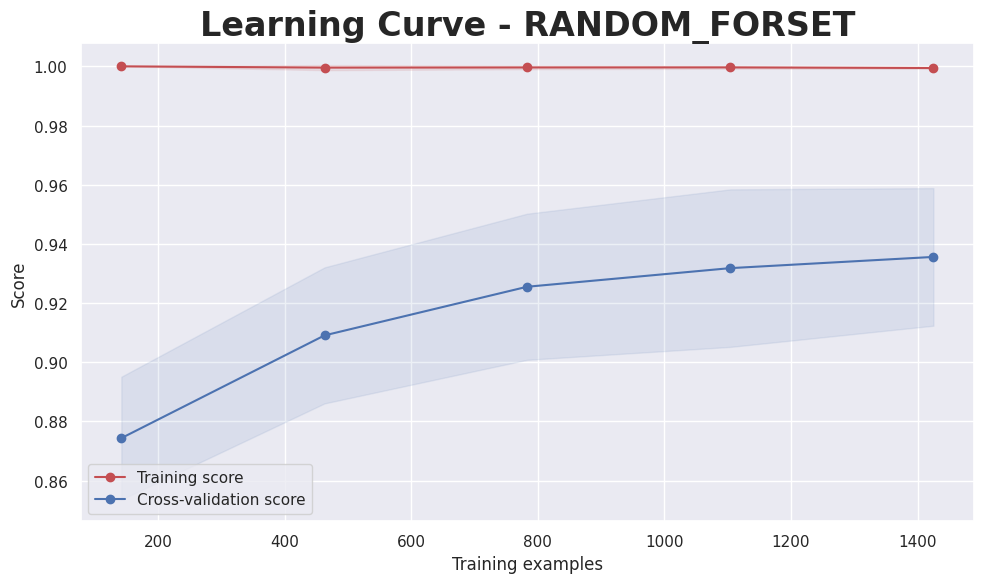

In [50]:
plot_learning_curve(grid_search_rf.best_estimator_, "Learning Curve - RANDOM_FORSET", X_train, y_train, n_jobs=-1)

## **10-DecisionTreeClassifier algorithm_with a best pramter from gridsearch**

In [51]:
param= {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [1, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10]}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(),param , cv=10)
grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10]})

In [52]:
best_params_for_tree = grid_search_tree.best_params_
print(best_params_for_tree)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2}


In [53]:
tree = DecisionTreeClassifier(**best_params_for_tree, random_state=42)
tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=42)

In [54]:
y_pred_dt = tree.predict(X_test)
print("classification_report", classification_report(y_test,y_pred_dt))
print("accuracy  ==" ,accuracy_score(y_test,y_pred_dt) * 100)

classification_report               precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       420
         2.0       0.68      0.63      0.65        73
         3.0       0.78      0.81      0.79        36

    accuracy                           0.90       529
   macro avg       0.80      0.80      0.80       529
weighted avg       0.90      0.90      0.90       529

accuracy  == 89.79206049149339


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

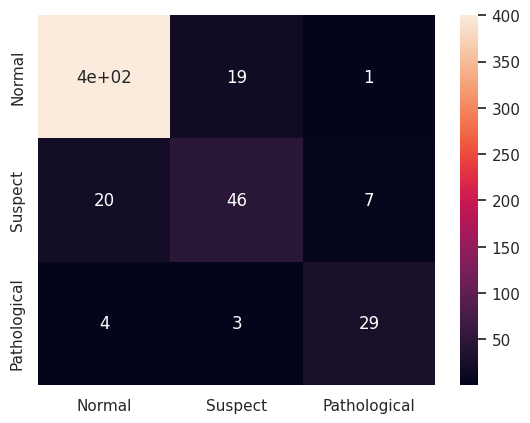

In [55]:
cm = confusion_matrix(y_test,y_pred_dt)
ax = plt.subplot()
sns.heatmap(cm , annot= True)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

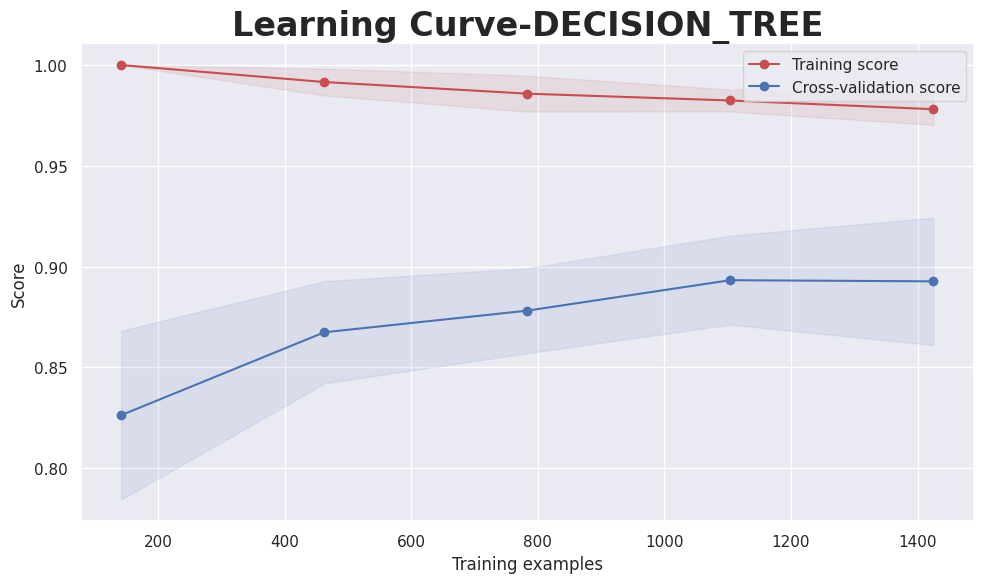

In [56]:
plot_learning_curve(grid_search_tree.best_estimator_, "Learning Curve-DECISION_TREE", X_train, y_train, n_jobs=-1)

## **11-GaussianNBClassifiersi algorithm_with a best pramter from gridsearch**

In [57]:
gs_model= GaussianNB()

In [58]:
gs_model.fit(X_train, y_train)


GaussianNB()

In [59]:
y_pred_gb = tree.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_gb))
print("accuracy == "  ,accuracy_score(y_test,y_pred_gb) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       420
         2.0       0.68      0.63      0.65        73
         3.0       0.78      0.81      0.79        36

    accuracy                           0.90       529
   macro avg       0.80      0.80      0.80       529
weighted avg       0.90      0.90      0.90       529

accuracy ==  89.79206049149339


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

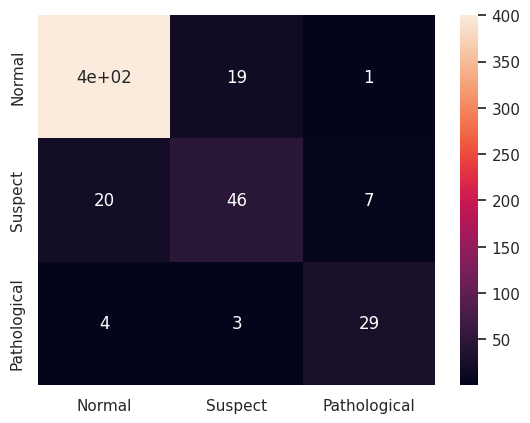

In [60]:
cm = confusion_matrix(y_test,y_pred_gb)
ax = plt.subplot()
sns.heatmap(cm , annot= True)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

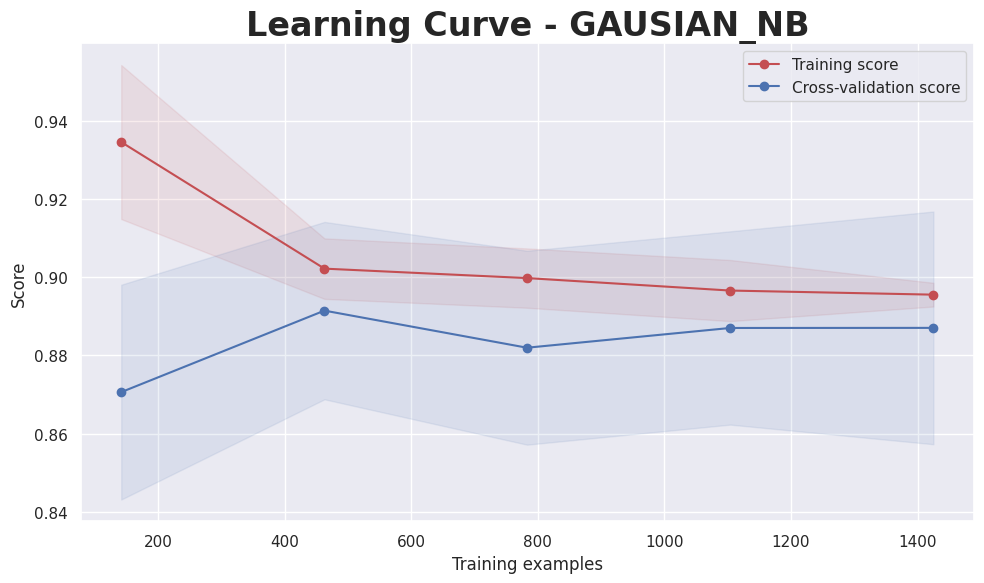

In [61]:
plot_learning_curve(Grid_model.best_estimator_, "Learning Curve - GAUSIAN_NB", X_train, y_train, n_jobs=-1)

## **12 -MLClassifiersi algorithm**

In [62]:
ml_classifer = MLPClassifier()
ml_classifer.fit(X_train, y_train)


MLPClassifier()

In [63]:
y_pred_ml = ml_classifer.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_ml))
print("accuracy ==" ,accuracy_score(y_test,y_pred_ml) * 100)

classification_report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       420
         2.0       0.87      0.73      0.79        73
         3.0       0.92      0.92      0.92        36

    accuracy                           0.94       529
   macro avg       0.91      0.88      0.89       529
weighted avg       0.94      0.94      0.94       529

accuracy == 94.3289224952741


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

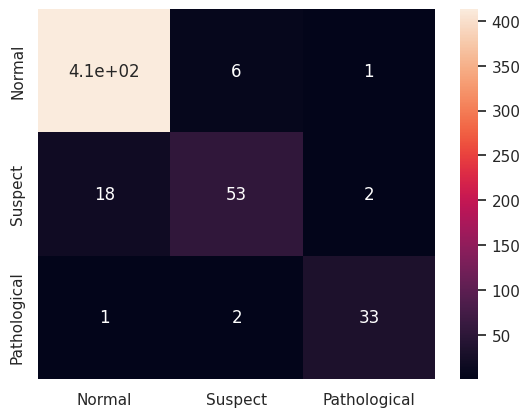

In [64]:
cm = confusion_matrix(y_test,y_pred_ml)
ax = plt.subplot()
sns.heatmap(cm , annot= True)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

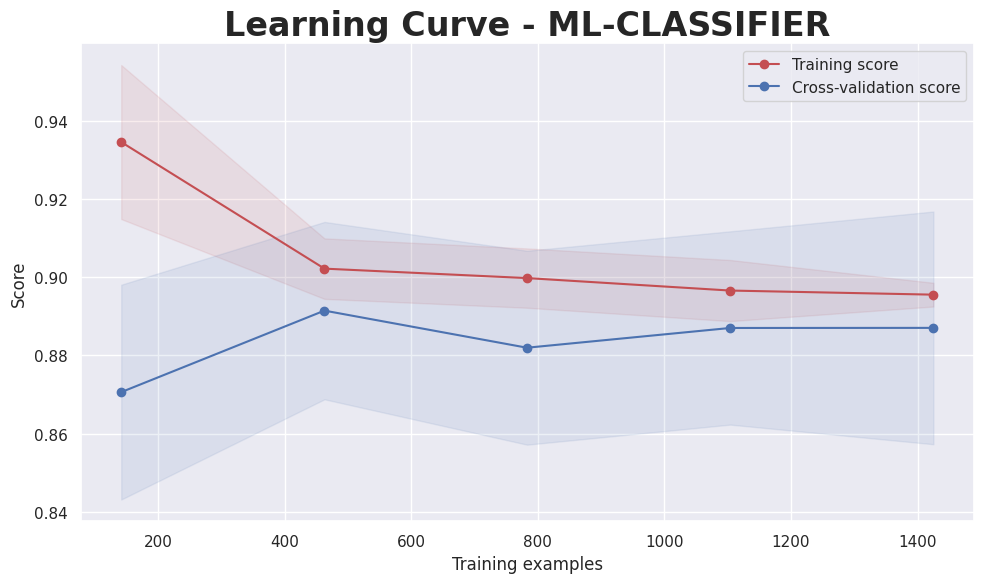

In [65]:
plot_learning_curve(Grid_model.best_estimator_, "Learning Curve - ML-CLASSIFIER", X_train, y_train, n_jobs=-1)

## **13- xgboost algorithm**

In [67]:
pd.DataFrame( {
    'Model': ['KNN', 'Random Forest', 'SVC', 'Decision_tree','ML_classifer','GaussianNB','LogisticRegression'],
    'Training Score': [
                         knn.score(X_train, y_train),
                              rf_classifier.score(X_train, y_train),
                                   svc_classifier.score(X_train, y_train),
                                     ml_classifer.score(X_train, y_train), 
                                        gs_model.score(X_train,y_train), 
                                           log_model.score(X_train,y_train),
                                           tree.score(X_train, y_train),
                                               
                                                                              ],
    'Test Score': [accuracy_score(y_test, y_pred_knn),
                        accuracy_score(y_test, y_pred_rf),
                           accuracy_score(y_test, y_pred_svc), 
                               accuracy_score(y_test,y_pred_ml),
                                 accuracy_score(y_test,y_pred_gb), 
                                      accuracy_score(y_test,y_pred_log),
                                          accuracy_score(y_test,y_pred_dt),
                                            
                                                                                ],
    'Error': [
               knn.score(X_train, y_train) - accuracy_score(y_test, y_pred_knn), 
                 rf_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_rf), 
                     svc_classifier.score(X_train, y_train) - accuracy_score(y_test, y_pred_svc),
                       ml_classifer.score(X_train, y_train)- accuracy_score(y_test,y_pred_ml), 
                          gs_model.score(X_train,y_train) -accuracy_score(y_test,y_pred_gb),
                           log_model.score(X_train,y_train) -accuracy_score(y_test,y_pred_log), 
                           tree.score(X_train, y_train)- accuracy_score(y_test,y_pred_dt),
                              

                      ]
})
  

,Model,Training Score,Test Score,Error
0,KNN,0.999369,0.920605,0.078764
1,Random Forest,0.999369,0.962193,0.037176
2,SVC,0.960859,0.954631,0.006227
3,Decision_tree,0.970328,0.943289,0.027039
4,ML_classifer,0.712121,0.897921,-0.185799
5,GaussianNB,0.893939,0.913043,-0.019104
6,LogisticRegression,0.969697,0.897921,0.071776
